# SAM
## Segment Anything

### Slim Sam

SlimSAM is a novel SAM compression method, which efficiently reuses pre-trained SAMs without the necessity for extensive retraining. This is achieved by the efficient reuse of pre-trained SAMs through a unified pruning-distillation framework. To enhance knowledge inheritance from the original SAM, we employ an innovative alternate slimming strategy that partitions the compression process into a progressive procedure. Diverging from prior pruning techniques, we meticulously prune and distill decoupled model structures in an alternating fashion. Furthermore, a novel label-free pruning criterion is also proposed to align the pruning objective with the optimization target, thereby boosting the post-distillation after pruning.



In [10]:
from transformers import pipeline
from PIL import Image

In [11]:
#utils from for plotting
#https://medium.com/python-and-machine-learning-pearls/image-parts-with-segment-anything-model-sam-model-31952efa2fb2

import numpy as np
import matplotlib.pyplot as plt
import gc

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
        print(str(color))
    else:
        color = np.array([30 / 255, 144 / 255, 255 / 255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    del mask
    gc.collect()

def show_masks_on_image(raw_image, masks):
  plt.imshow(np.array(raw_image))
  ax = plt.gca()
  ax.set_autoscale_on(False)
  for mask in masks:
      show_mask(mask, ax=ax, random_color=True)
  plt.axis("off")
  plt.show()
  del mask
  gc.collect()

In [18]:
sam_pipe = pipeline(
    "mask-generation",
    "Zigeng/SlimSAM-uniform-77",
    device="mps") #if mps doesnt work, fallback to cpu

In [25]:
raw_image = Image.open('images/nusantara.png')
raw_image = raw_image.resize((1200,700))
raw_image.size

(1200, 700)

In [20]:
# https://huggingface.co/docs/transformers/tasks/mask_generation
output = sam_pipe(raw_image,
                  points_per_batch=32,
                  pred_iou_thresh=0.88)

In [26]:
len(output["masks"])

42

[0.01085731 0.02177974 0.52687016 0.6       ]
[0.52382774 0.97801789 0.19848569 0.6       ]
[0.24194324 0.90116608 0.58838228 0.6       ]
[0.3122574  0.77039492 0.35885214 0.6       ]
[0.13055061 0.50973087 0.68907272 0.6       ]
[0.2959387  0.69453268 0.53456769 0.6       ]
[0.01958441 0.9615101  0.99605676 0.6       ]
[0.59576345 0.4100334  0.01771026 0.6       ]
[0.77809009 0.65866935 0.32188791 0.6       ]
[0.63051035 0.53395225 0.480452   0.6       ]
[0.01355742 0.30950805 0.67901368 0.6       ]
[0.63806525 0.26922206 0.9111361  0.6       ]
[0.47395464 0.43255381 0.36791079 0.6       ]
[0.68945487 0.15592403 0.27937295 0.6       ]
[0.44278994 0.47620239 0.03001068 0.6       ]
[0.54117023 0.96731269 0.51561866 0.6       ]
[0.50665962 0.67069249 0.28822358 0.6       ]
[0.38923098 0.12533402 0.76231257 0.6       ]
[0.19777998 0.901765   0.08378495 0.6       ]
[0.89624379 0.52423189 0.23003451 0.6       ]
[0.6745504  0.37753725 0.09995107 0.6       ]
[0.68133215 0.75570805 0.69269757 

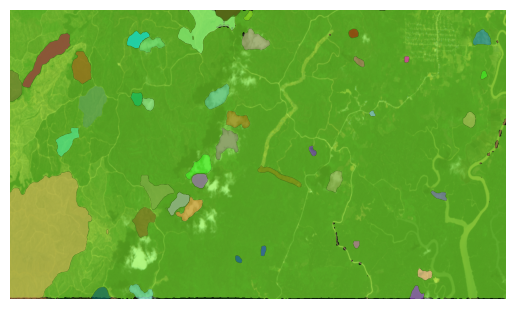

In [27]:
show_masks_on_image(raw_image, output["masks"])

In [ ]:
raw_image